In [104]:
import numpy as np
import pandas as pd

In [105]:
df = pd.read_csv("dirty_iris.csv", na_values=[np.inf])
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [106]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Dat

In [107]:
df1=df.dropna()
df1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
7,5.9,3.0,5.1,1.8,virginica
...,...,...,...,...,...
143,6.3,2.9,5.6,1.8,virginica
144,5.7,2.5,5.0,2.0,virginica
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor


In [108]:
(df1.shape[0] / df.shape[0]) * 100

63.33333333333333

In [109]:
df["Petal.Width"].unique()

array([1.5, 2.5, 2.3, 0.4, 1. , 0.2, nan, 1.8, 0.6, 1.6, 1.4, 1.3, 0.1,
       2.1, 2. , 1.2, 1.9, 2.2, 0.3, 1.1, 1.7, 2.4, 0.5])

In [110]:
df[df.iloc[:, :-1] < 0] = np.nan

In [111]:
df["Sepal.Width"].unique()

array([ 3.2,  3.3,  nan,  3.4,  2.6,  2.7,  3. ,  3.1,  3.5,  2.8,  3.9,
        4. ,  3.6, 29. ,  2.9,  2.2,  2.5,  4.2,  3.8,  2.3,  3.7,  4.1,
       30. ,  0. ])

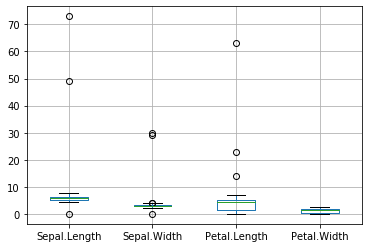

In [112]:
df.boxplot()

In [113]:
df_original = pd.read_csv("dirty_iris.csv")
df_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [114]:
set(df.Species)

{'setosa', 'versicolor', 'virginica'}

In [115]:
def check_label(df):
    species_check = lambda x : x in {'setosa', 'versicolor', 'virginica'}
    return df["Species"].apply(species_check)

In [116]:
label_check = check_label(df)

In [117]:
def check_positive(df):
    # positive=lambda x: (np.isfinite(x)&x>0) or x==np.isinf 
    pos = lambda x: x > 0
    and_lambda = lambda x: x[0] and x[1] and x[2] and x[3]
    return df.iloc[:, :-1].apply(pos).apply(and_lambda, axis=1)
    

In [118]:
positive_check = check_positive(df)

In [119]:
def check_petal_length(df):
    pl_check = lambda x: x[0] >= 2 * x[1]
    return df[["Petal.Length", "Petal.Width"]].apply(pl_check, axis=1)

In [120]:
petal_check = check_petal_length(df)

In [121]:
def check_sepal_length(df):
    return df[["Sepal.Length"]].apply(lambda x : x < 30)

In [122]:
sepal_check = check_sepal_length(df)

In [123]:
def sepal_length(df):
    pl_check = lambda x: x[0] > x[1]
    return df[["Sepal.Length", "Petal.Length"]].apply(pl_check, axis=1)

In [124]:
length_sepal = sepal_length(df)

In [125]:
print("No. of times rule 1 is broken: ", len(label_check) - label_check.value_counts().at[True])
print("No. of times rule 2 is broken: ", len(positive_check) - label_check.value_counts().at[True])
print("No. of times rule 3 is broken: ", len(petal_check) - label_check.value_counts().at[True])
print("No. of times rule 4 is broken: ", len(sepal_check) - label_check.value_counts().at[True])
print("No. of times rule 5 is broken: ", len(length_sepal) - label_check.value_counts().at[True])

No. of times rule 1 is broken:  0
No. of times rule 2 is broken:  0
No. of times rule 3 is broken:  0
No. of times rule 4 is broken:  0
No. of times rule 5 is broken:  0
